# Analisa Data Penduduk Miskin dan Indeks Kemiskinan

Menganalisa data kemiskinan dan indeks kemiskinan.

Sumber Data : https://data.go.id/dataset/penduduk-miskin-dan-indeks-kemiskinan


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_kemiskinan = pd.read_csv('processed-penduduk-miskin-indeks-kemiskinan-2007-2010.csv', delimiter=',')

# Deskripsi Data

In [7]:
print('Jumlah Baris dan Kolom :', data_kemiskinan.shape)
print('Index Kolom :', data_kemiskinan.columns)
print(data_kemiskinan.head())

Jumlah Baris dan Kolom : (1880, 10)
Index Kolom : Index(['kode_provinsi', 'nama_provinsi', 'kode_kabkota', 'nama_kabkota',
       'tahun', 'jumlah_penduduk_miskin', 'persen_penduduk_miskin',
       'indeks_p1', 'indeks_p2', 'garis_kemiskinan'],
      dtype='object')
   kode_provinsi                   nama_provinsi  kode_kabkota  \
0             11  Prov. Nanggroe Aceh Darussalam          1101   
1             11  Prov. Nanggroe Aceh Darussalam          1101   
2             11  Prov. Nanggroe Aceh Darussalam          1101   
3             11  Prov. Nanggroe Aceh Darussalam          1101   
4             11  Prov. Nanggroe Aceh Darussalam          1102   

        nama_kabkota  tahun  jumlah_penduduk_miskin  persen_penduduk_miskin  \
0      Kab. Simeulue   2007                 25100.0                   32.26   
1      Kab. Simeulue   2008                 20600.0                   26.45   
2      Kab. Simeulue   2009                 19100.0                   24.72   
3      Kab. Simeulue

# Statistik Data

In [132]:
jumlah_provinsi = data_kemiskinan.kode_provinsi.value_counts().index
jumlah_kabkota = data_kemiskinan.kode_kabkota.value_counts().index

jumlah_penduduk_prov = data_kemiskinan.groupby(['kode_provinsi', 'nama_provinsi']).sum()['jumlah_penduduk_miskin']
jumlah_penduduk_kab = data_kemiskinan.groupby(['kode_kabkota', 'nama_kabkota']).sum()['jumlah_penduduk_miskin']

jumlah_pend_mis_max = data_kemiskinan.jumlah_penduduk_miskin.max()
jumlah_pend_mis_min = data_kemiskinan.jumlah_penduduk_miskin.min()
total_pend_mis= data_kemiskinan.jumlah_penduduk_miskin.sum()
avg_pend_mis = data_kemiskinan.jumlah_penduduk_miskin.mean()

print("Jumlah Provinsi Yang terdapat pada data : ", len(jumlah_provinsi))
print("\n")
print("Jumlah Kabupaten Yang tedapat pada data : ", len(jumlah_kabkota))
print("\n")
print("Jumlah Penduduk Miskin disetiap Provinsi : ", jumlah_penduduk_prov)
print("\n")
print("Jumlah Penduduk Miskin disetiap Kabupaten : ", jumlah_penduduk_kab)
print("\n")
print("Jumlah Penduduk Miskin Terbanyak : ", jumlah_pend_mis_max)
print("\n")
print("Jumlah Penduduk Miskin Terkecil : ", jumlah_pend_mis_min)
print("\n")
print("Jumlah Penduduk Miskin seluruhnya : ", total_pend_mis)
print("\n")
print("Jumlah Rata-rata Penduduk Miskin : ", avg_pend_mis)



Jumlah Provinsi Yang terdapat pada data :  33


Jumlah Kabupaten Yang tedapat pada data :  497


Jumlah Penduduk Miskin disetiap Provinsi :  kode_provinsi  nama_provinsi                  
11             Prov. Nanggroe Aceh Darussalam      3830000.0
12             Prov. Sumatera Utara                6331500.0
13             Prov. Sumatera Barat                1887700.0
14             Prov. Riau                          2249700.0
15             Prov. Jambi                         1048900.0
16             Prov. Sumatera Selatan              4821200.0
17             Prov. Bengkulu                      1298600.0
18             Prov. Lampung                       6108100.0
19             Prov. Kepulauan Bangka Belitung      343700.0
21             Prov. Kepulauan Riau                 543700.0
31             Prov. DKI Jakarta                   1476500.0
32             Prov. Jawa Barat                   20276500.0
33             Prov. Jawa Tengah                  23553500.0
34             Prov

# Visual Data

Text(0,0.5,'Total')

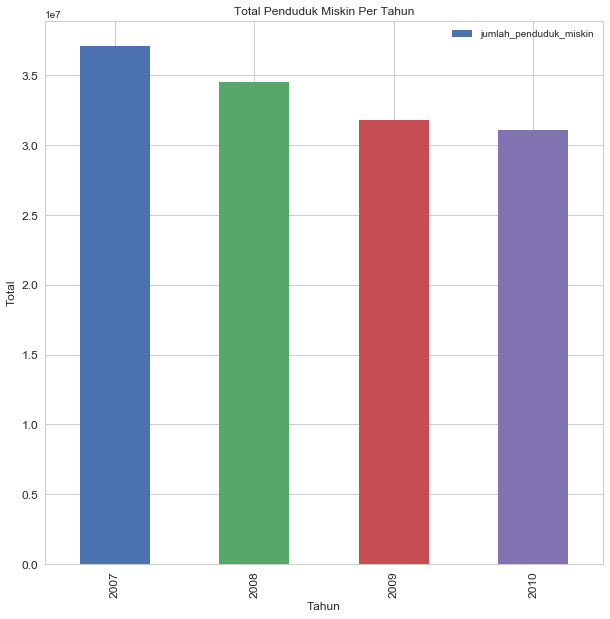

In [129]:
# sns.set(style ='whitegrid')
vs_jlh_pen_tahun = data_kemiskinan.groupby('tahun').sum()['jumlah_penduduk_miskin']

vs_jlh_pen_tahun = vs_jlh_pen_tahun.plot(kind='bar', title="Total Penduduk Miskin Per Tahun", legend=True, fontsize=12, figsize=(10,10))
vs_jlh_pen_tahun.set_xlabel("Tahun", fontsize=12)
vs_jlh_pen_tahun.set_ylabel("Total", fontsize=12)


Text(0,0.5,'Total')

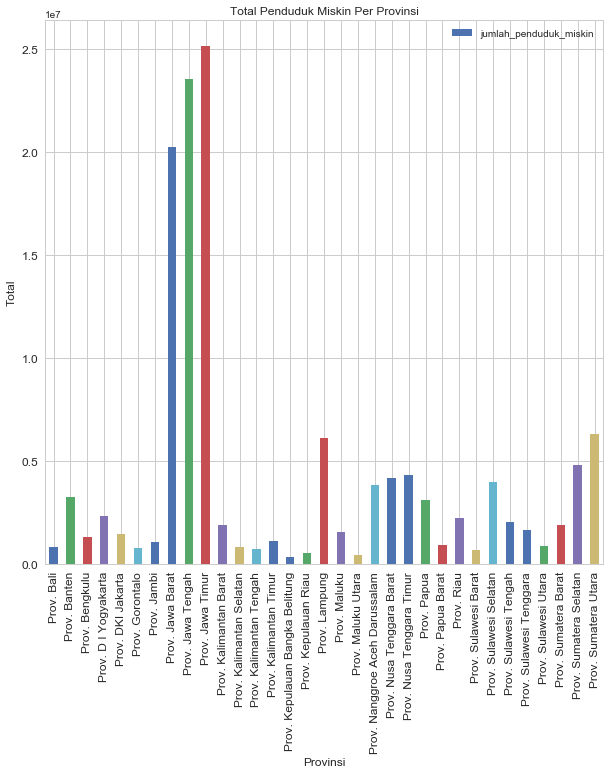

In [130]:
vs_jlh_pen_provinsi = data_kemiskinan.groupby('nama_provinsi').sum()['jumlah_penduduk_miskin']
vs_jlh_pen_provinsi = vs_jlh_pen_provinsi.plot(kind='bar', title="Total Penduduk Miskin Per Provinsi", legend=True, fontsize=12, figsize=(10,10))
vs_jlh_pen_provinsi.set_xlabel("Provinsi", fontsize=12)
vs_jlh_pen_provinsi.set_ylabel("Total", fontsize=12)

Text(0,0.5,'Total')

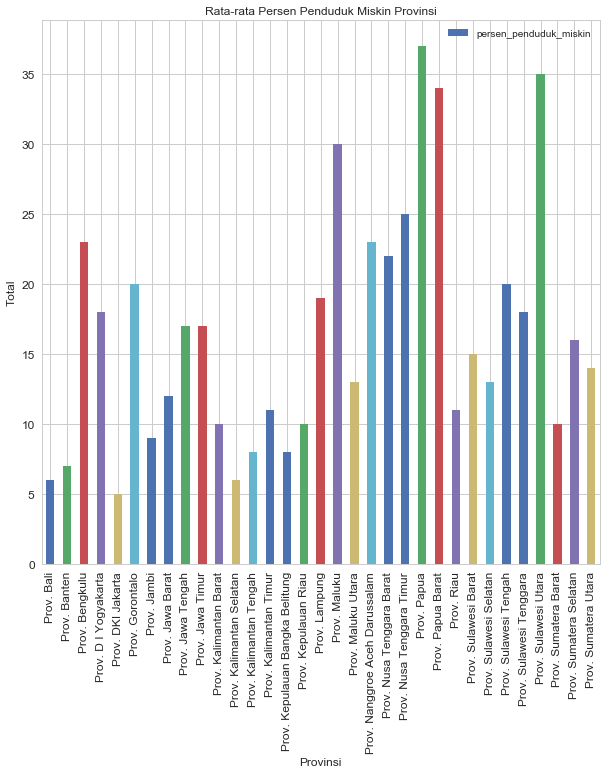

In [131]:
vs_avg_per_prov = data_kemiskinan.groupby('nama_provinsi').mean()['persen_penduduk_miskin'].astype(int)
vs_avg_per_prov = vs_avg_per_prov.plot(kind='bar', title="Rata-rata Persen Penduduk Miskin Provinsi", legend=True, fontsize=12, figsize=(10,10))
vs_avg_per_prov.set_xlabel("Provinsi", fontsize=12)
vs_avg_per_prov.set_ylabel("Total", fontsize=12)

Dari beberapa diagram visual diatas terlihat bahwa pada tahun 2007-2010 tingkat penduduk miskin semakin menurun. Provinsi yang memiliki tingkat penduduk miskin terbesar ialah jawa timur dan terkecil ialah kepuluan bangka belitung. Angka terbesar jumlah penduduk miskin dalam kurun tahun 2007-2010 yaitu 519500. Dalam analisis data yang sederhana ini, faktor-faktor apa saja yang berdampak pada tingkat angka kemiskinan.? Apa tingkat pengangguran.?